In [7]:
# 01_exploration.ipynb

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns  # optional but nice

plt.style.use("ggplot")  # nicer default plots

DATA_PATH = os.path.join("..", "data", "raw", "ai4i2020.csv")


In [8]:
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
df.head()


Shape: (10000, 14)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [10]:
df.isna().sum() #missing values


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [11]:
df.describe(include="all")


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,L57163,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [12]:
target = "Machine failure"

df[target].value_counts()


Machine failure
0    9661
1     339
Name: count, dtype: int64

In [13]:
df[target].value_counts(normalize=True)


Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64

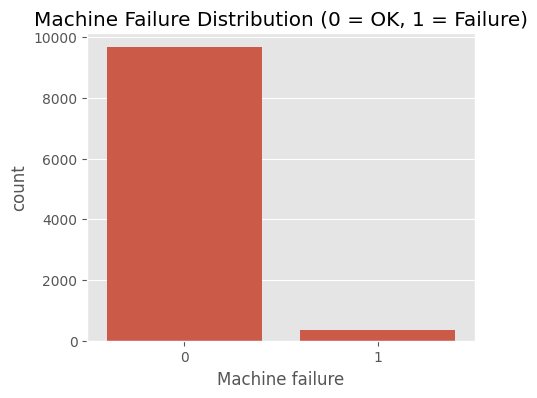

In [14]:
plt.figure(figsize=(5,4))
sns.countplot(x=target, data=df)
plt.title("Machine Failure Distribution (0 = OK, 1 = Failure)")
plt.show()


In [15]:
failure_cols = ["TWF", "HDF", "PWF", "OSF", "RNF"]

df[failure_cols].sum().sort_values(ascending=False)


HDF    115
OSF     98
PWF     95
TWF     46
RNF     19
dtype: int64

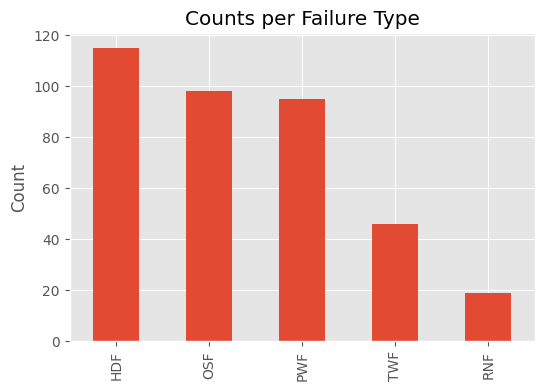

In [16]:
plt.figure(figsize=(6,4))
df[failure_cols].sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Counts per Failure Type")
plt.ylabel("Count")
plt.show()


In [17]:
df["Product ID"].nunique(), df["Type"].value_counts()


(10000,
 Type
 L    6000
 M    2997
 H    1003
 Name: count, dtype: int64)

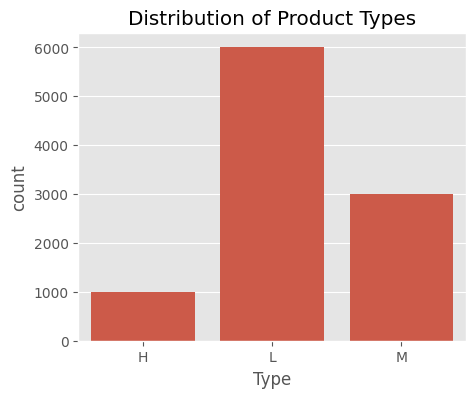

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(x="Type", data=df, order=sorted(df["Type"].unique()))
plt.title("Distribution of Product Types")
plt.show()


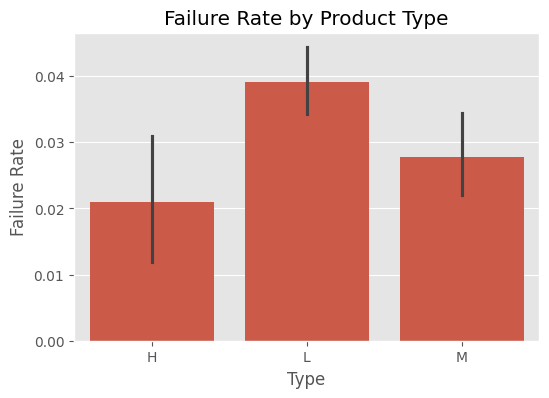

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(x="Type", y=target, data=df, estimator=np.mean, order=sorted(df["Type"].unique()))
plt.title("Failure Rate by Product Type")
plt.ylabel("Failure Rate")
plt.show()


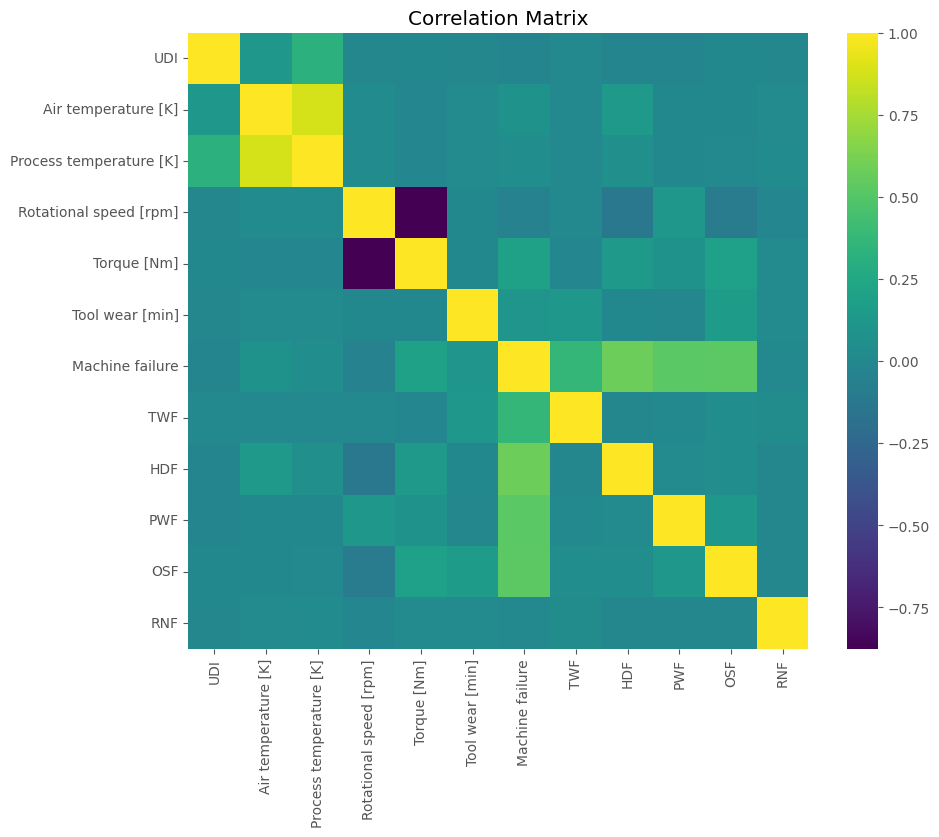

In [20]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


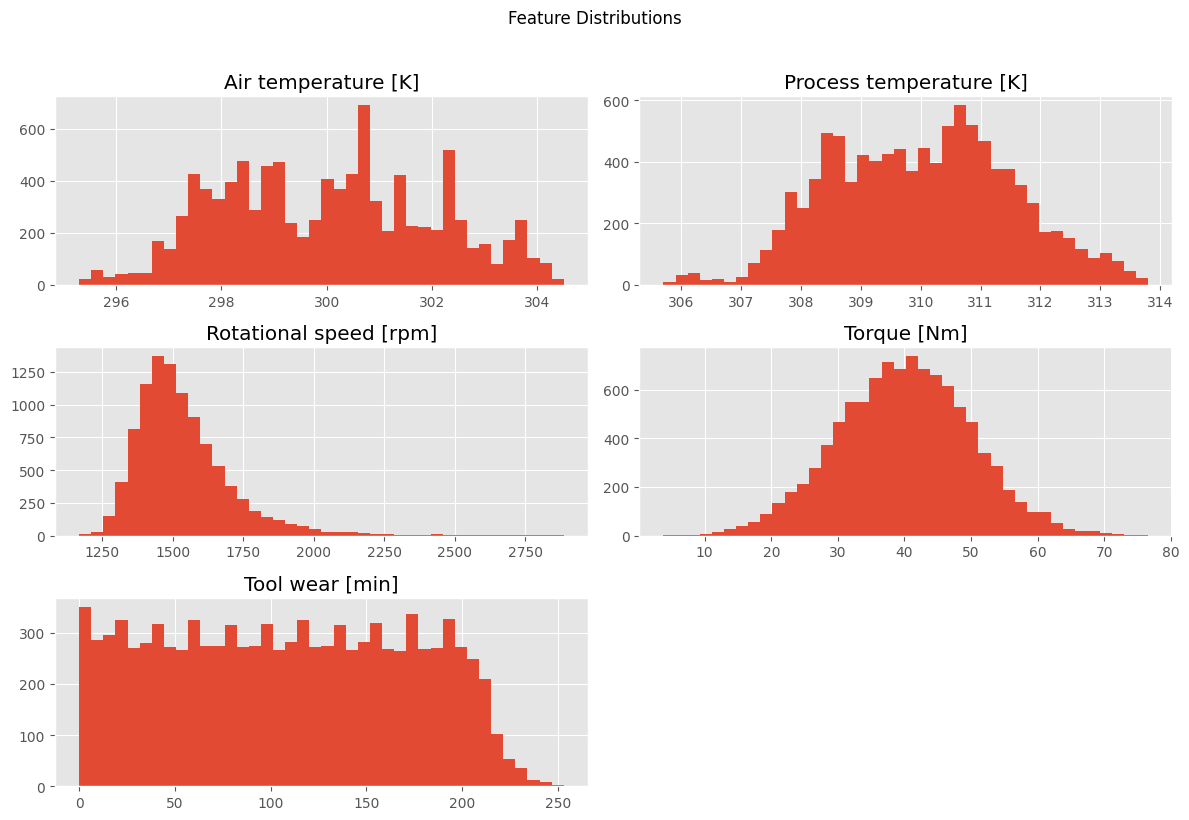

In [21]:
feature_cols = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]"
]

df[feature_cols].hist(bins=40, figsize=(12,8))
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()


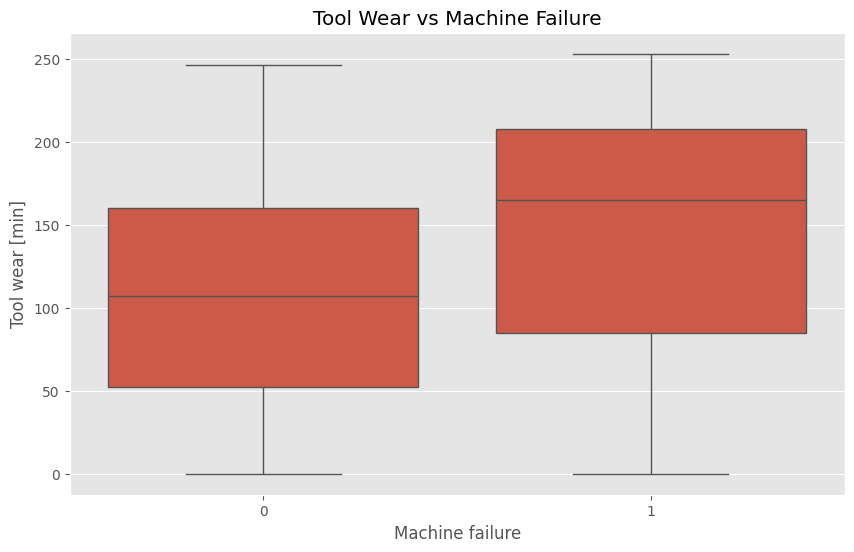

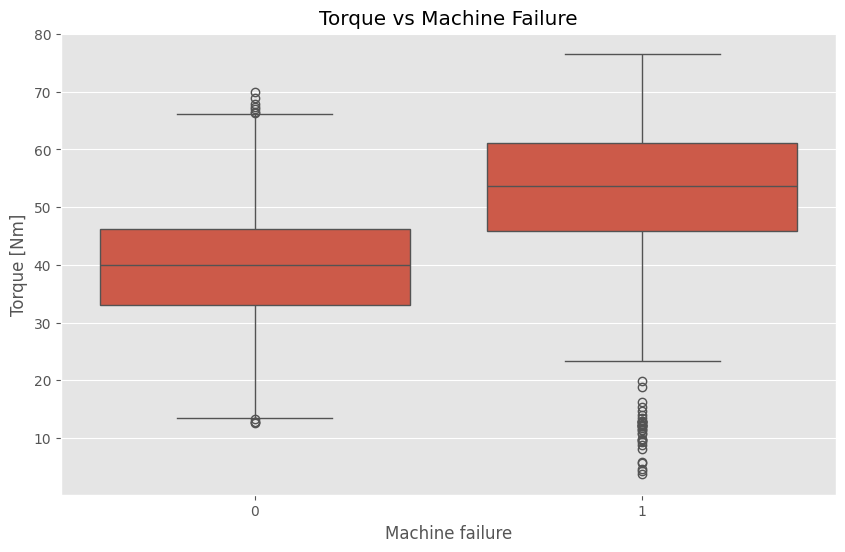

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x=target, y="Tool wear [min]", data=df)
plt.title("Tool Wear vs Machine Failure")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=target, y="Torque [Nm]", data=df)
plt.title("Torque vs Machine Failure")
plt.show()


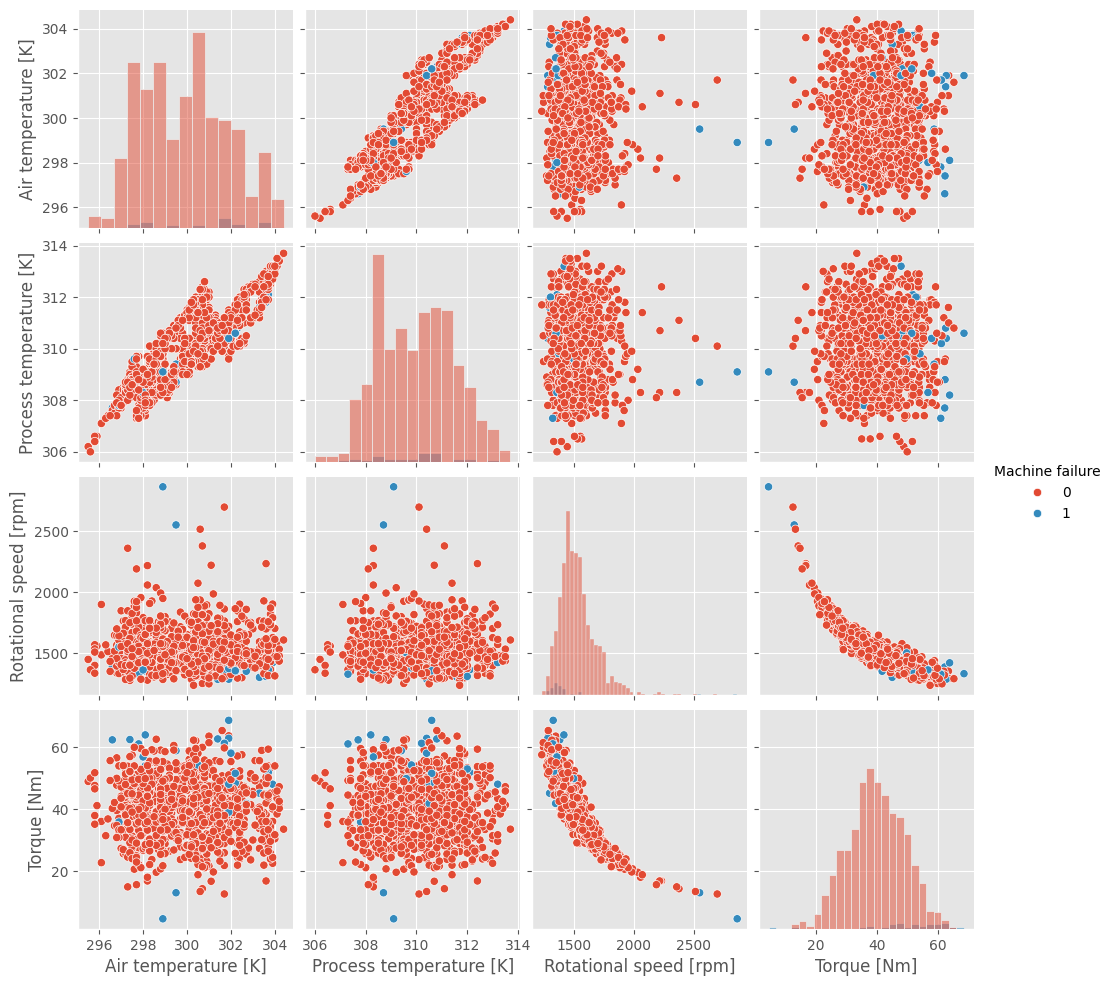

In [23]:
small_subset = ["Air temperature [K]", "Process temperature [K]", 
                "Rotational speed [rpm]", "Torque [Nm]", target]

sns.pairplot(df[small_subset].sample(1000, random_state=42), 
             hue=target, diag_kind="hist")
plt.show()


In [24]:
def iqr_outlier_mask(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return (series < lower) | (series > upper)

outlier_counts = {}
for c in feature_cols:
    outlier_counts[c] = iqr_outlier_mask(df[c]).sum()

outlier_counts


{'Air temperature [K]': np.int64(0),
 'Process temperature [K]': np.int64(0),
 'Rotational speed [rpm]': np.int64(418),
 'Torque [Nm]': np.int64(69),
 'Tool wear [min]': np.int64(0)}


EDA summary (ai4i2020):

- 10,000 rows, 14 columns.
- No missing values.
- Machine failure is highly imbalanced (~3-4% failures).
- Product Type has 3 categories (L/M/H); Product ID is effectively an identifier.
- Strong negative correlation between rotational speed and torque.
- Failures tend to occur at higher tool wear and (potentially) different torque / speed regimes.
- Feature ranges look physically plausible; some outliers exist but not extreme.

Implications:
- For fault classification: need to handle class imbalance.
- For anomaly detection / RUL: tool wear and torque are key signals.
- Data is clean enough to move to ETL + feature engineering next.



In [1]:
import os
import pandas as pd
import numpy as np

RAW_PATH = os.path.join("..", "data", "raw", "ai4i2020.csv")
PROCESSED_PATH = os.path.join("..", "data", "processed", "ai4i2020_prepared.csv")
os.makedirs(os.path.dirname(PROCESSED_PATH), exist_ok=True)

df_raw = pd.read_csv(RAW_PATH)

# 1) Drop pure IDs
df_prep = df_raw.drop(columns=["UDI", "Product ID"])

# 2) Simple engineered features
df_prep["Temp_diff"] = df_prep["Process temperature [K]"] - df_prep["Air temperature [K]"]
df_prep["Power_proxy"] = df_prep["Rotational speed [rpm]"] * df_prep["Torque [Nm]"]
df_prep["Tool_wear_norm"] = df_prep["Tool wear [min]"] / df_prep["Tool wear [min]"].max()

df_prep.to_csv(PROCESSED_PATH, index=False)
PROCESSED_PATH


'../data/processed/ai4i2020_prepared.csv'